In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

 ### a) Асимптотическое представление
- Выпишите асимптотическое представление для решения задачи Коши:  
  $u(0) = 1$, $\dot{u}(0) = 0$.  
- Если асимптотическая формула предсказывает возникновение автоколебаний, найдите амплитуду предельного периодического решения.

### б) Фазовые портреты
- Для нескольких значений $\varepsilon$ постройте фазовые портреты данного уравнения.

### в) Численное решение
- Постройте численно решения задачи Коши с начальными данными:  
  $u(0) = 1$, $\dot{u}(0) = 0$  
  для нескольких достаточно малых значений $\varepsilon$.  
- Сравните графики полученных численных и асимптотических решений на большом промежутке по $t$.

# Пункт а)

Уравнение для моего варианта:  
### $$\ddot{u} + \varepsilon(\dot{u}^2 - u^2 - 1)\dot{u} + u = 0$$

### Метод многих масштабов
$${\Large{\displaystyle u(t) = u_0(\tau_0, \tau_1, ... ) + \varepsilon \cdot u_1(\tau_0, \tau_1, ... ) + ...}}$$  
$${\Large{\displaystyle \dot{u}(t) = \frac{\partial u_0}{\partial \tau_0}  + \varepsilon \cdot (\frac{\partial u_0}{\partial \tau_1} + \frac{\partial u_1}{\partial \tau_0}) + ...}}$$  
$${\Large{\displaystyle \ddot{u}(t) = \frac{\partial^2 u_0}{\partial \tau_0^2}  + 2 \varepsilon \cdot \frac{\partial^2 u_0}{\partial \tau_0 \partial \tau_1} + \varepsilon \frac{\partial^2 u_1}{\partial \tau_0^2} + ...}}$$

### Выпишем промежуточные выражения, которые будут использоваться в уравнении ( до второго порядка точности )
$${\Large{\displaystyle \dot{u}(t)^2 = (\frac{\partial u_0}{\partial \tau_0})^2}}$$
$${\Large{\displaystyle u(t)^2 = u_0^2}}$$

### В произведении $ (\dot{u}(t)^2 - u(t)^2 - 1) \cdot \dot{u}(t) $ все члены $\dot{u}(t) $ у которых есть множитель $\varepsilon$ отбросим так как они в дальнейшем дадут порядок выше второго. Получим: 
$${\Large{\displaystyle  (\dot{u}(t)^2 - u(t)^2 - 1) \cdot \dot{u}(t) = \left[(\frac{\partial u_0}{\partial \tau_0})^2 - u_0^2 - 1 \right] \cdot \frac{\partial u_0}{\partial \tau_0} = (\frac{\partial u_0}{\partial \tau_0})^3 - u_0^2 \cdot \frac{\partial u_0}{\partial \tau_0} - \frac{\partial u_0}{\partial \tau_0} }}$$

### Итоговый вид уравнения:
$${\Large{\displaystyle  \frac{\partial^2 u_0}{\partial \tau_0^2}  + 2 \varepsilon \frac{\partial^2 u_0}{\partial \tau_0 \partial \tau_1} + \varepsilon \frac{\partial^2 u_1}{\partial \tau_0^2} + \varepsilon \left[ (\frac{\partial u_0}{\partial \tau_0})^3 - u_0^2 \cdot \frac{\partial u_0}{\partial \tau_0} - \frac{\partial u_0}{\partial \tau_0} \right] + u_0 + \varepsilon u_1 =0 }}$$  
$${\Large{\displaystyle  \frac{\partial^2 u_0}{\partial \tau_0^2} + u_0 + \varepsilon \left[ 2 \frac{\partial^2 u_0}{\partial \tau_0 \partial \tau_1} + \frac{\partial^2 u_1}{\partial \tau_0^2} + (\frac{\partial u_0}{\partial \tau_0})^3 - u_0^2 \cdot \frac{\partial u_0}{\partial \tau_0} - \frac{\partial u_0}{\partial \tau_0} + u_1 \right] = 0 }}$$
### Найдём к-ты при $\varepsilon$
$${\Large {\displaystyle \varepsilon^{0}: \;\;\; \frac{\partial^2 u_0}{\partial \tau_0^2} + u_0 = 0 \;\;\; => \;\;\; u_0 = A(\tau_1)\cos(\tau_0 + \varphi(\tau_1)) }}$$


$${\Large {\displaystyle \varepsilon^{1}: \;\;\; 2\frac{\partial^2 u_0}{\partial \tau_0 \partial \tau_1} + \frac{\partial^2 u_1}{\partial \tau_0^2} + (\frac{\partial u_0}{\partial \tau_0})^3 - u_0^2 \cdot \frac{\partial u_0}{\partial \tau_0} - \frac{\partial u_0}{\partial \tau_0} + u_1 = 0 }}$$


Приведем к нужному для нас виду:
$$ {\Large {\displaystyle \varepsilon^{1}: \;\;\; \frac{\partial^2 u_1}{\partial \tau_0^2} + u_1 = -2\frac{\partial^2 u_0}{\partial \tau_0 \partial \tau_1} - (\frac{\partial u_0}{\partial \tau_0})^3 + u_0^2 \cdot \frac{\partial u_0}{\partial \tau_0} + \frac{\partial u_0}{\partial \tau_0} }} $$ 

### Промежуточные вычисления производных
$$
{\Large {\displaystyle \begin{cases}
\displaystyle -2\frac{\partial^2 u_0}{\partial \tau_0 \partial \tau_1} = \left[ -2A(\tau_1)\sin(\tau_0+\varphi(\tau_1))\right]_{\tau_1}=2\frac{\partial A(\tau_1)}{\partial \tau_1}\sin(\tau_0+\varphi(\tau_1)) + 2A(\tau_1)\cos(\tau_0+\varphi(\tau_1))\frac{\partial \varphi(\tau_1)}{\partial \tau_1} \\
\displaystyle \frac{\partial u_0}{\partial \tau_0} = -A(\tau_1)\sin(\tau_0+\varphi(\tau_1))
\displaystyle \end{cases}}}
$$
### Некоторые обозначения, которые сделают дальнейшие выкладки короче:
$$ {\Large {\displaystyle  \theta = \tau_0+\varphi(\tau_1), \;\;\; A(\tau_1)=A, \;\;\; A' = \frac{\partial A(\tau_1)}{\partial \tau_1}, \;\;\; \varphi'= \frac{\partial \varphi(\tau_1)}{\partial \tau_1}  }} $$

$$ {\Large {\displaystyle \frac{\partial^2 u_1}{\partial \tau_0^2} + u_1 = \sin(\theta)(2A'-A)+A^3\sin^3 (\theta)-A^3\cos^2(\theta)\sin(\theta)+2A\cos(\theta)\varphi'  }}$$   
### Устранение секулярных членов

#### Сделаем замены:
$$
{\Large {\displaystyle \begin{cases}
\displaystyle \sin^3(\theta)=\frac{3\sin(\theta)-\sin(3\theta)}{4} \\
\\
\displaystyle \cos^2(\theta)\sin(\theta)=\frac{\sin(\theta)+\sin(3\theta)}{4}
\displaystyle \end{cases}}}
$$

$$ {\Large {\displaystyle A^3\sin^3(\theta) - A^3\cos^2(\theta)\sin(\theta) = A^3\left(\frac{3\sin(\theta) - \sin3(\theta)}{4}\right) - A^3\left(\frac{\sin(\theta) + \sin3(\theta)}{4}\right) = \frac{A^3}{2}\sin(\theta) - \frac{A^3}{2}\sin3(\theta)}}$$ 

#### С учётом замен уравнение принимает вид:

$$ {\Large {\displaystyle \frac{\partial^2 u_1}{\partial τ_0^2} + u_1 = (2A'-A)\sin(\theta) + \left(\frac{A^3}{2}\sin(\theta) - \frac{A^3}{2}\sin3(\theta)\right) + 2Aφ'\cos(\theta) }}$$

#### Группируем 

$$ {\Large {\displaystyle  \frac{\partial^2 u_1}{\partial \tau_0^2} + u_1 = \sin(\theta)(2A'-A+\frac{A^3}{2}) - \frac{A^3}{2}\sin(3\theta) +2A\cos(\theta)\varphi'}}$$

#### Зависимость правой части от $\tau_1$ позволяет "убить" секулярные члены, которые таи присутствуют. Необходимо потребовать, чтобы

$$ {\Large {\displaystyle 2A\frac{\partial \varphi}{\partial \tau_1}=0 \quad \Rightarrow \quad \frac{dφ}{dτ_1} = 0 \quad \varphi(\tau_1)≡\varphi_0 - const }}$$
$$ {\Large {\displaystyle 2\frac{dA}{d\tau_1}-A+\frac{A^3}{2} = 0}} \quad \quad {\Large {\displaystyle(*)}} $$
#### Решим *

$$ {\Large {\displaystyle 4\frac{dA}{2A - A^3}= d\tau_1}}$$
$$ {\Large {\displaystyle 4\int \frac{dA}{A(2 - A^2)}= \tau_1}}$$
#### Метод неопределённых к-ов
$$ {\Large {\displaystyle \frac{1}{x(2 - x^2)} = \frac{Ax+B}{2-x^2} + \frac{C}{x} = \frac{x}{2(2-x^2)} + \frac{1}{2x} }}$$



$$ {\Large {\displaystyle x\cdot (Ax+B)  + C(2-x^2) = 1}}$$
$ {\Large {\displaystyle x = \sqrt{2}}}$
$$ {\Large {\displaystyle \sqrt{2}(A\sqrt{2} + B) = 1}}$$
$ {\Large {\displaystyle x = -\sqrt{2}}}$
$$ {\Large {\displaystyle -\sqrt{2}(-A\sqrt{2} + B) = 1}}$$
$$ {\Large {\displaystyle A  = \frac{1}{2}, \quad B = 0}}$$
$ {\Large {\displaystyle x = 0}}$
$$ {\Large {\displaystyle C = \frac{1}{2}}}$$


#### Вернемся к исходному уравнению
$$ {\Large {\displaystyle 2\cdot \cancel{2} \left( \int \frac{A dA}{\cancel{2}(2-A^2)} + \int \frac{dA}{\cancel{2}A} \right) = \tau_1}}$$
$$
{\Large {\displaystyle \begin{cases}
\displaystyle \int \frac{A dA}{2-A^2} = -\frac{1}{2}\int \frac{d(2-A^2)}{2-A^2} = -\frac{1}{2}\ln{|2-A^2|} \\
\\
\displaystyle \int \frac{dA}{A} =  \ln{|A|}
\displaystyle \end{cases}}}
$$

$$ {\Large {\displaystyle 2\ln{|A|}-\ln{|2-A^2|}=\tau_1 }}$$
$$ {\Large {\displaystyle \ln{\left(\frac{A^2}{2-A^2}\right)}=\tau_1 }}$$
$$ {\Large {\displaystyle \frac{A^2}{2-A^2}=A(0)e^{\tau_1} }}$$
$$ {\Large {\displaystyle A^2(1+A(0)e^{\tau_1})=2A(0)e^{\tau_1} }}$$
$$ {\Large {\displaystyle A= \sqrt{\frac{2A(0)e^{\tau_1}}{1+A(0)e^{\tau_1}}}= \sqrt{\frac{2}{1+\frac{e^{-\tau_1}}{A(0)}} }} }$$


#### Найдем значения $A(0)$ и $\varphi(0)$
Из начальных условий   $u(0) = 1$, $\dot{u}(0) = 0$ имеем  
$$ {\Large{\displaystyle  1 = u(0) = u_0(\tau_0, \tau_1) + \varepsilon u_1(\tau_0, \tau_1) }}$$  
$$ {\Large{\displaystyle u_0(0, 0), \quad u_1(0, 0)=0 }}$$  
$$ {\Large{\displaystyle  0 = \dot{u}(0) = \frac{\partial u_0}{\partial \tau_0}(0,0) + \varepsilon \left(\frac{\partial u_0}{\partial \tau_1}(0,0) + \frac{\partial u_0}{\partial \tau_0}(0,0) \right)}}$$  
$$ {\Large{\displaystyle  \frac{\partial u_0}{\partial \tau_0}(0,0) =0, \quad \frac{\partial u_0}{\partial \tau_1}(0,0) + \frac{\partial u_0}{\partial \tau_0}(0,0) = 0}}$$  
$$ {\Large{\displaystyle  A(0)\cos(\varphi_0) = 1 \quad -A(0)\sin(\varphi_0) = 0 }}$$  
$ {\Large {\displaystyle \varphi_0  = 0, \quad A(0) = 1 }}$  
$ {\Large {\displaystyle A(\tau_1)= \sqrt{\frac{2}{1+\frac{e^{-\tau_1}}{A(0)}} }} }$


### Для $u(t)$ имеем
$$ {\Large{\displaystyle  u(t) = A(\tau_1)\cos(\tau_0 + \varphi(\tau_1)) = \sqrt{\frac{2}{1+\frac{e^{-\tau_1}}{A(0)}}} \cdot \cos(\tau_0 + \varphi_0) = \sqrt{\frac{2}{1+e^{-\varepsilon t}}}} \cdot \cos(t) }$$  

### Амплитуда предельного переодического решения

#### При ${\displaystyle t \to \infty}$ экспонента ${\displaystyle e^{-\varepsilon t} \to 0}$, поэтому амплитуда стремится к:
$$
{\Large A_{\text{lim}} = \sqrt{2}.}
$$
#### Таким образом, система выходит на **предельный цикл** с амплитудой $\sqrt{2}.$

# Пункт б)

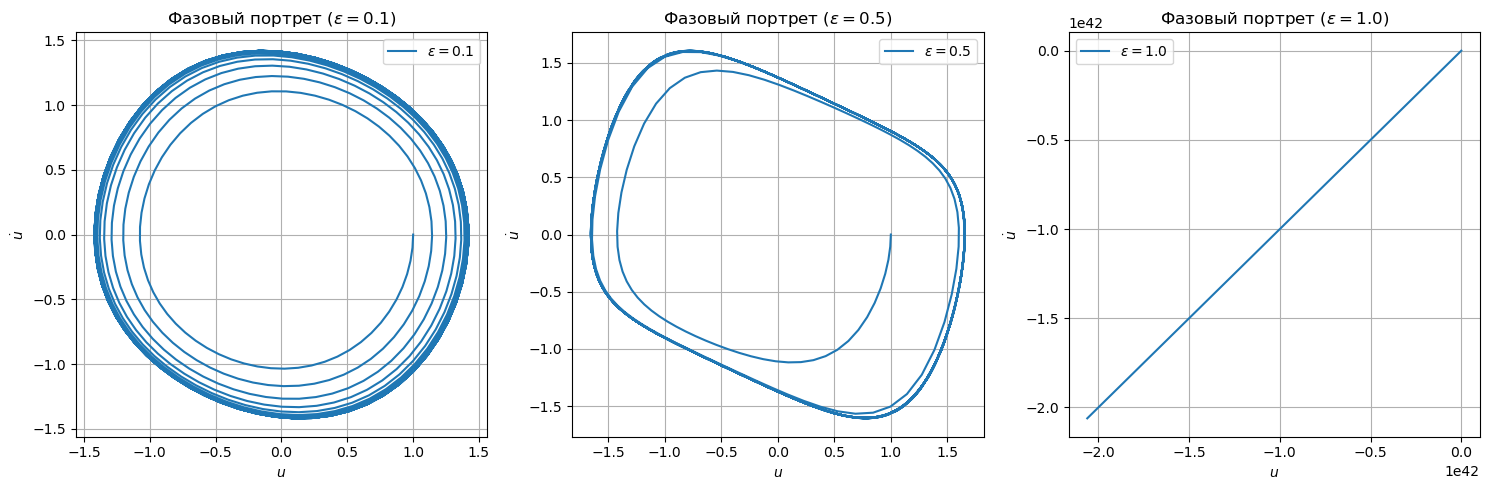

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def duffing_oscillator(t, y, epsilon):
    u, v = y
    dudt = v
    dvdt = -u - epsilon * (v**2 - u**2 - 1) * v
    return [dudt, dvdt]

# Параметры для фазовых портретов
epsilons = [0.1, 0.5, 1.0]
u0 = 1.0
v0 = 0.0
t_span = (0, 100)
y0 = [u0, v0]

# Построение фазовых портретов
plt.figure(figsize=(15, 5))
for i, eps in enumerate(epsilons):
    sol = solve_ivp(duffing_oscillator, t_span, y0, args=(eps,),method='BDF', rtol=1e-6, atol=1e-8, dense_output=True) # BDF - какой-то метод для жестких систем
    # Жесткая система - система ДУ при решении которой явными методами для малого шага резко увеличивается число шагов. Либо, если шаг недостаточно мал - сильно растет погрешность
    t = np.linspace(t_span[0], t_span[1], 1000)
    y = sol.sol(t)
    u, v = y[0], y[1]
    
    plt.subplot(1, 3, i+1)
    plt.plot(u, v, label=rf'$\epsilon = {eps}$')
    plt.xlabel(r'$u$') 
    plt.ylabel(r'$\dot{u}$')
    plt.title(rf'Фазовый портрет ($\epsilon = {eps}$)')
    plt.grid()
    plt.legend()

plt.tight_layout()
plt.show()

# Пункт в)

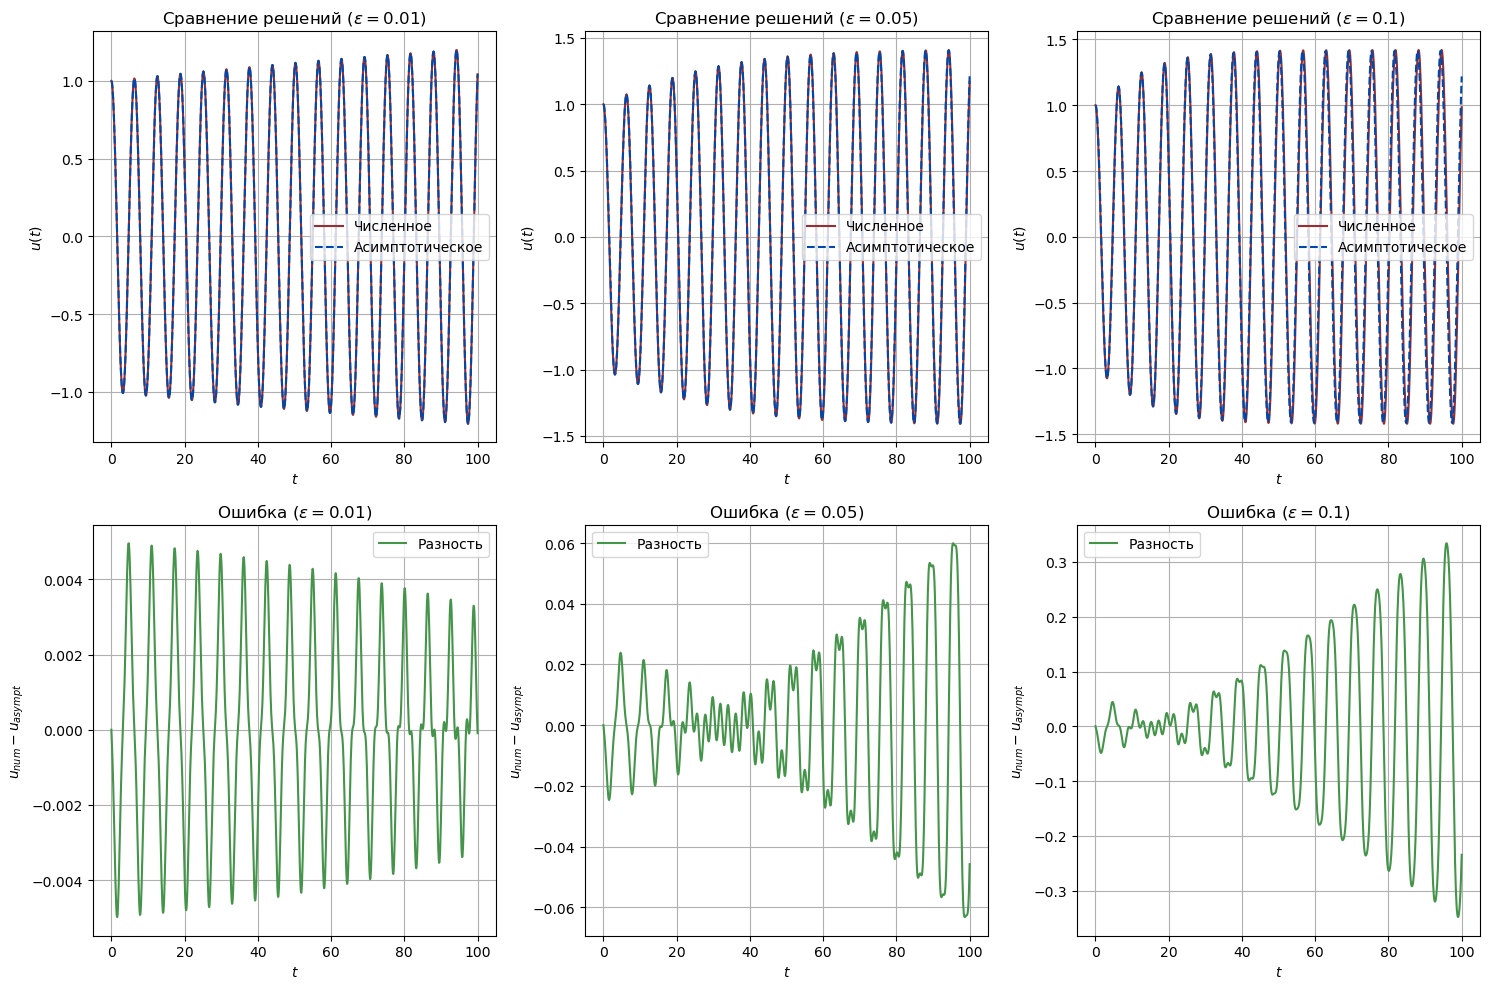

In [19]:
# Параметры для численного решения
epsilons = [0.01, 0.05, 0.1]
t_span = (0, 100)
y0 = [u0, v0]

# Асимптотическое решение
def asymptotic_solution(t, epsilon):
    A = np.sqrt(2 / (1 + np.exp(-epsilon * t)))
    return A * np.cos(t)

# Построение решений
plt.figure(figsize=(15, 10))
for i, eps in enumerate(epsilons):
    # Численное решение
    sol = solve_ivp(duffing_oscillator, t_span, y0, args=(eps,),method='BDF', rtol=1e-6, atol=1e-8, dense_output=True)
    t_num = np.linspace(t_span[0], t_span[1], 1000)
    u_num = sol.sol(t_num)[0]
    
    # Асимптотическое решение
    u_asympt = asymptotic_solution(t_num, eps)
    
    plt.subplot(2, 3, i+1)
    plt.plot(t_num, u_num, color='#9B2D30', label='Численное')
    plt.plot(t_num, u_asympt, '--', color='#0047AB', label='Асимптотическое')
    plt.xlabel(r'$t$')
    plt.ylabel(r'$u(t)$')
    plt.title(rf'Сравнение решений ($\epsilon = {eps}$)')
    plt.legend()
    plt.grid()
    
    # Разность решений
    plt.subplot(2, 3, i+4)
    plt.plot(t_num, u_num - u_asympt, color='#44944A', label='Разность')
    plt.xlabel(r'$t$')
    plt.ylabel(r'$u_{num} - u_{asympt}$')
    plt.title(rf'Ошибка ($\epsilon = {eps}$)')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()